# Análise de Max Amplitude por Planos - Eventos Sísmicos A001

Este notebook realiza a análise de **max_magnitude** para os dados sísmicos do arquivo `eventsA001_cut25seg_results.csv`.

A análise é feita **por plano (G, H, E)** com foco em:
- Análise de frequência das magnitudes por plano
- Histogramas de distribuição de max_magnitude
- Análise estatística comparativa entre planos

## 1. Import Required Libraries

Importando as bibliotecas necessárias para análise de dados e visualização.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Load and Explore Data

Carregando e explorando a estrutura dos dados do arquivo CSV.

In [53]:
# Definir o caminho do arquivo
data_path = Path("resultados_csv/eventsA001_cut25seg_results.csv")

# Verificar se o arquivo existe
if data_path.exists():
    print(f"Arquivo encontrado: {data_path}")
else:
    print(f"Arquivo não encontrado: {data_path}")
    print("Verifique o caminho do arquivo.")

Arquivo encontrado: resultados_csv/eventsA001_cut25seg_results.csv


In [54]:
# Carregar os dados
df = pd.read_csv(data_path)

print("Dados carregados com sucesso!")
print(f"\nDimensões do dataset: {df.shape}")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Dados carregados com sucesso!

Dimensões do dataset: (5353, 8)

Colunas disponíveis:
1. event_id
2. plane
3. max_magnitude
4. sensor
5. x_amplitude
6. y_amplitude
7. z_amplitude
8. source_file


In [55]:
# Visualizar as primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df.head())

print("\nInformações gerais do dataset:")
display(df.info())

Primeiras 5 linhas do dataset:


,event_id,plane,max_magnitude,sensor,x_amplitude,y_amplitude,z_amplitude,source_file
0,71355,Plano_E,0.000008,SC.MAC11.00,5.311948e-06,4.619220e-06,4.247604e-06,eventsA001_cut25seg.csv
1,71355,Plano_G,0.000005,BR.ESM09,3.382420e-06,1.842891e-06,2.549331e-06,eventsA001_cut25seg.csv
2,71355,Plano_H,0.000010,BR.ESM08,5.039811e-06,7.826915e-06,3.511332e-06,eventsA001_cut25seg.csv
3,71360,Plano_E,0.000007,SC.MAC11.00,3.822484e-06,3.903765e-06,4.685221e-06,eventsA001_cut25seg.csv
4,71360,Plano_G,0.000001,BR.ESM09,5.367241e-07,5.903165e-07,9.229594e-07,eventsA001_cut25seg.csv



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_id       5353 non-null   int64  
 1   plane          5353 non-null   object 
 2   max_magnitude  5353 non-null   float64
 3   sensor         5353 non-null   object 
 4   x_amplitude    5353 non-null   float64
 5   y_amplitude    5353 non-null   float64
 6   z_amplitude    5353 non-null   float64
 7   source_file    5353 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 334.7+ KB


None

## 3. Data Preprocessing

Limpeza e preparação dos dados para análise.

In [56]:
# Verificar valores nulos
print("Valores nulos por coluna:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

if null_counts.sum() == 0:
    print("Nenhum valor nulo encontrado!")

Valores nulos por coluna:
Series([], dtype: int64)
Nenhum valor nulo encontrado!


In [57]:
# Verificar tipos de dados da coluna max_magnitude
print("Tipo de dados da coluna max_magnitude:")
if 'max_magnitude' in df.columns:
    print(f"max_magnitude: {df['max_magnitude'].dtype}")
    
    # Garantir que a coluna é numérica
    df['max_magnitude'] = pd.to_numeric(df['max_magnitude'], errors='coerce')
    
    print("\nColuna max_magnitude convertida para formato numérico.")
    print(f"Valores nulos após conversão: {df['max_magnitude'].isnull().sum()}")
else:
    print("Coluna 'max_magnitude' não encontrada no dataset!")
    print("Colunas disponíveis:")
    for col in df.columns:
        print(f"  - {col}")

Tipo de dados da coluna max_magnitude:
max_magnitude: float64

Coluna max_magnitude convertida para formato numérico.
Valores nulos após conversão: 0


## 4. Max Amplitude Analysis

Análise da coluna `max_magnitude` e suas estatísticas básicas.

In [58]:
# Análise da coluna max_magnitude
if 'max_magnitude' in df.columns:
    print("Análise de max_magnitude realizada com sucesso!")
    print(f"\nPrimeiros valores de max_magnitude:")
    display(df[['event_id', 'plane', 'sensor', 'max_magnitude']].head(10))
    
    # Verificar valores válidos
    valid_amplitudes = df['max_magnitude'].notna()
    print(f"\nRegistros com max_magnitude válida: {valid_amplitudes.sum()}")
    print(f"Registros com max_magnitude nula: {(~valid_amplitudes).sum()}")
else:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
    print("Continuando análise sem esta coluna...")

Análise de max_magnitude realizada com sucesso!

Primeiros valores de max_magnitude:


,event_id,plane,sensor,max_magnitude
0,71355,Plano_E,SC.MAC11.00,0.000008
1,71355,Plano_G,BR.ESM09,0.000005
2,71355,Plano_H,BR.ESM08,0.000010
3,71360,Plano_E,SC.MAC11.00,0.000007
4,71360,Plano_G,BR.ESM09,0.000001
5,71360,Plano_H,BR.ESM08,0.000004
6,71363,Plano_G,BR.ESM09,0.000004
7,71363,Plano_H,BR.ESM01,0.000095
8,71370,Plano_E,SC.MAC11.00,0.000007
9,71370,Plano_G,BR.ESM09,0.000002



Registros com max_magnitude válida: 5353
Registros com max_magnitude nula: 0


In [59]:
# Estatísticas da max_magnitude
if 'max_magnitude' in df.columns:
    print("Estatísticas da max_magnitude:")
    amplitude_stats = df['max_magnitude'].describe()
    display(amplitude_stats)
    
    if amplitude_stats['min'] > 0:
        print(f"\nRazão entre valor máximo e mínimo: {amplitude_stats['max'] / amplitude_stats['min']:.2e}")
    else:
        print(f"\nValor mínimo é zero ou negativo, não é possível calcular razão.")
else:
    print("Coluna max_magnitude não disponível para análise estatística.")

Estatísticas da max_magnitude:


count    5.353000e+03
mean     3.517339e-05
std      1.467234e-04
min      4.015913e-07
25%      3.090623e-06
50%      7.958173e-06
75%      4.933970e-05
max      6.068628e-03
Name: max_magnitude, dtype: float64


Razão entre valor máximo e mínimo: 1.51e+04


## 5. Max Amplitude Analysis by Plane

Análise de frequência das magnitudes da coluna `max_magnitude` agrupada por plano (G, H, E) para identificar distribuição de magnitudes e padrões por plano.

In [60]:
# Análise da max_magnitude por plano
print("ANÁLISE DE max_magnitude POR PLANO:")
print("=" * 40)

# Verificar se a coluna existe
if 'max_magnitude' not in df.columns:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
    print("Colunas disponíveis:")
    print(list(df.columns))
else:
    # Verificar planos únicos
    unique_planes = df['plane'].unique()
    print(f"Planos únicos encontrados: {unique_planes}")
    print(f"Total de planos: {len(unique_planes)}")
    
    # Estatísticas da max_magnitude por plano
    for plane in unique_planes:
        plane_data = df[df['plane'] == plane]
        print(f"\n--- PLANO {plane} ---")
        print(f"Total de registros: {len(plane_data)}")
        
        # Análise da max_magnitude
        amp_data = plane_data['max_magnitude'].dropna()
        if len(amp_data) > 0:
            amp_stats = amp_data.describe()
            print(f"\nmax_magnitude:")
            print(f"  Registros válidos: {len(amp_data)}")
            print(f"  Média: {amp_stats['mean']:.6e}")
            print(f"  Mediana: {amp_stats['50%']:.6e}")
            print(f"  Desvio padrão: {amp_stats['std']:.6e}")
            print(f"  Mínimo: {amp_stats['min']:.6e}")
            print(f"  Máximo: {amp_stats['max']:.6e}")
        else:
            print(f"  Sem dados válidos de max_magnitude para o plano {plane}")
    
    # Resumo comparativo entre planos
    print(f"\n{'='*50}")
    print("RESUMO COMPARATIVO ENTRE PLANOS:")
    print(f"{'='*50}")
    
    # Criar resumo apenas para max_magnitude
    comparison_stats = df.groupby('plane')['max_magnitude'].agg(['count', 'mean', 'std', 'min', 'max']).round(8)
    display(comparison_stats)

ANÁLISE DE max_magnitude POR PLANO:
Planos únicos encontrados: ['Plano_E' 'Plano_G' 'Plano_H']
Total de planos: 3

--- PLANO Plano_E ---
Total de registros: 1221

max_magnitude:
  Registros válidos: 1221
  Média: 9.209188e-06
  Mediana: 7.998555e-06
  Desvio padrão: 7.429061e-06
  Mínimo: 3.879348e-06
  Máximo: 9.973046e-05

--- PLANO Plano_G ---
Total de registros: 2066

max_magnitude:
  Registros válidos: 2066
  Média: 4.259911e-06
  Mediana: 2.520843e-06
  Desvio padrão: 4.948694e-06
  Mínimo: 4.015913e-07
  Máximo: 6.165096e-05

--- PLANO Plano_H ---
Total de registros: 2066

max_magnitude:
  Registros válidos: 2066
  Média: 8.143163e-05
  Mediana: 5.785942e-05
  Desvio padrão: 2.285657e-04
  Mínimo: 1.378053e-06
  Máximo: 6.068628e-03

RESUMO COMPARATIVO ENTRE PLANOS:


,count,mean,std,min,max
plane,,,,,
Plano_E,1221,0.000009,0.000007,3.880000e-06,0.000100
Plano_G,2066,0.000004,0.000005,4.000000e-07,0.000062
Plano_H,2066,0.000081,0.000229,1.380000e-06,0.006069


In [61]:
# Análise de frequência das magnitudes por plano
print("ANÁLISE DE FREQUÊNCIA DAS MAGNITUDES POR PLANO:")
print("=" * 55)

if 'max_magnitude' not in df.columns:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
else:
    # Função para criar intervalos de amplitude
    def create_amplitude_intervals(amplitude_series, n_intervals=10):
        """Cria intervalos de amplitude com número especificado de intervalos"""
        min_amp = amplitude_series.min()
        max_amp = amplitude_series.max()
        
        # Criar intervalos lineares
        bins = np.linspace(min_amp, max_amp, n_intervals + 1)
        return bins
    
    planes = df['plane'].unique()
    
    print(f"Planos analisados: {list(planes)}")
    print(f"Coluna analisada: max_magnitude")
    
    # Análise de frequência para max_magnitude
    print(f"\n{'-'*60}")
    print(f"ANÁLISE DE FREQUÊNCIA - max_magnitude")
    print(f"{'-'*60}")
    
    for plane in planes:
        plane_data = df[df['plane'] == plane]['max_magnitude'].dropna()
        
        if len(plane_data) > 0:
            # Calcular range dos dados
            data_range = plane_data.max() - plane_data.min()
            
            # Número adaptativo de intervalos baseado na quantidade de dados
            if len(plane_data) < 50:
                n_intervals = 5
            elif len(plane_data) < 200:
                n_intervals = 10
            else:
                n_intervals = 15
            
            bins = create_amplitude_intervals(plane_data, n_intervals)
            
            # Criar histograma
            counts, bin_edges = np.histogram(plane_data, bins=bins)
            
            print(f"\nPlano {plane}:")
            print(f"  Range: {plane_data.min():.6e} a {plane_data.max():.6e}")
            print(f"  Registros válidos: {len(plane_data)}")
            print(f"  Número de intervalos: {len(counts)}")
            print(f"  Distribuição de frequências:")
            
            for i, (count, start, end) in enumerate(zip(counts, bin_edges[:-1], bin_edges[1:])):
                percentage = (count / len(plane_data)) * 100
                print(f"    Intervalo {i+1}: [{start:.6e} - {end:.6e}): {count} ({percentage:.1f}%)")
        else:
            print(f"\nPlano {plane}: Sem dados válidos de max_magnitude")
    
    # Análise de percentis por plano
    print(f"\n{'='*70}")
    print("DISTRIBUIÇÃO POR PERCENTIS - max_magnitude:")
    print(f"{'='*70}")
    
    for plane in planes:
        plane_data = df[df['plane'] == plane]['max_magnitude'].dropna()
        
        if len(plane_data) > 0:
            # Calcular percentis
            percentiles = [0, 10, 25, 50, 75, 90, 95, 99, 100]
            percentile_values = np.percentile(plane_data, percentiles)
            
            print(f"\nPlano {plane} - Distribuição por percentis:")
            for p, val in zip(percentiles, percentile_values):
                print(f"    P{p:2d}: {val:.6e}")
            
            # Contar ocorrências em intervalos baseados em quartis
            q1 = np.percentile(plane_data, 25)
            q2 = np.percentile(plane_data, 50)
            q3 = np.percentile(plane_data, 75)
            
            count_q1 = (plane_data <= q1).sum()
            count_q2 = ((plane_data > q1) & (plane_data <= q2)).sum()
            count_q3 = ((plane_data > q2) & (plane_data <= q3)).sum()
            count_q4 = (plane_data > q3).sum()
            
            print(f"    Distribuição por quartis:")
            print(f"      Q1 (≤{q1:.6e}): {count_q1} ({(count_q1/len(plane_data)*100):.1f}%)")
            print(f"      Q2 ({q1:.6e} - {q2:.6e}]: {count_q2} ({(count_q2/len(plane_data)*100):.1f}%)")
            print(f"      Q3 ({q2:.6e} - {q3:.6e}]: {count_q3} ({(count_q3/len(plane_data)*100):.1f}%)")
            print(f"      Q4 (>{q3:.6e}): {count_q4} ({(count_q4/len(plane_data)*100):.1f}%)")
        else:
            print(f"\nPlano {plane}: Sem dados válidos para análise de percentis")

ANÁLISE DE FREQUÊNCIA DAS MAGNITUDES POR PLANO:
Planos analisados: ['Plano_E', 'Plano_G', 'Plano_H']
Coluna analisada: max_magnitude

------------------------------------------------------------
ANÁLISE DE FREQUÊNCIA - max_magnitude
------------------------------------------------------------

Plano Plano_E:
  Range: 3.879348e-06 a 9.973046e-05
  Registros válidos: 1221
  Número de intervalos: 15
  Distribuição de frequências:
    Intervalo 1: [3.879348e-06 - 1.026942e-05): 1040 (85.2%)
    Intervalo 2: [1.026942e-05 - 1.665950e-05): 138 (11.3%)
    Intervalo 3: [1.665950e-05 - 2.304957e-05): 18 (1.5%)
    Intervalo 4: [2.304957e-05 - 2.943965e-05): 8 (0.7%)
    Intervalo 5: [2.943965e-05 - 3.582972e-05): 3 (0.2%)
    Intervalo 6: [3.582972e-05 - 4.221979e-05): 2 (0.2%)
    Intervalo 7: [4.221979e-05 - 4.860987e-05): 1 (0.1%)
    Intervalo 8: [4.860987e-05 - 5.499994e-05): 3 (0.2%)
    Intervalo 9: [5.499994e-05 - 6.139002e-05): 1 (0.1%)
    Intervalo 10: [6.139002e-05 - 6.778009e-05):

In [62]:
# Análise detalhada de distribuição de max_magnitude por plano
print("DISTRIBUIÇÃO DETALHADA DE max_magnitude POR PLANO:")
print("=" * 55)

if 'max_magnitude' not in df.columns:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
else:
    planes = df['plane'].unique()
    
    print(f"\nmax_magnitude:")
    print("-" * 40)
    
    # Criar DataFrame resumo para max_magnitude
    summary_data = []
    
    for plane in planes:
        plane_data = df[df['plane'] == plane]['max_magnitude'].dropna()
        
        if len(plane_data) > 0:
            summary_data.append({
                'Plano': plane,
                'Registros': len(plane_data),
                'Média': plane_data.mean(),
                'Mediana': plane_data.median(),
                'Desvio_Padrão': plane_data.std(),
                'Mínimo': plane_data.min(),
                'Máximo': plane_data.max(),
                'Range': plane_data.max() - plane_data.min(),
                'Coef_Variação': plane_data.std() / plane_data.mean() if plane_data.mean() != 0 else 0
            })
        else:
            summary_data.append({
                'Plano': plane,
                'Registros': 0,
                'Média': np.nan,
                'Mediana': np.nan,
                'Desvio_Padrão': np.nan,
                'Mínimo': np.nan,
                'Máximo': np.nan,
                'Range': np.nan,
                'Coef_Variação': np.nan
            })
    
    summary_df = pd.DataFrame(summary_data)
    display(summary_df.round(8))
    
    # Análise de sobreposição entre planos
    print(f"\n{'='*60}")
    print("ANÁLISE DE SOBREPOSIÇÃO ENTRE PLANOS - max_magnitude:")
    print(f"{'='*60}")
    
    # Calcular ranges de cada plano
    plane_ranges = {}
    for plane in planes:
        plane_data = df[df['plane'] == plane]['max_magnitude'].dropna()
        
        if len(plane_data) > 0:
            plane_ranges[plane] = {
                'min': plane_data.min(),
                'max': plane_data.max(),
                'q25': plane_data.quantile(0.25),
                'q75': plane_data.quantile(0.75)
            }
        else:
            plane_ranges[plane] = {
                'min': np.nan,
                'max': np.nan,
                'q25': np.nan,
                'q75': np.nan
            }
    
    # Verificar sobreposições entre planos
    valid_planes = [p for p in planes if not np.isnan(plane_ranges[p]['min'])]
    
    for i, plane1 in enumerate(valid_planes):
        for plane2 in valid_planes[i+1:]:
            range1 = plane_ranges[plane1]
            range2 = plane_ranges[plane2]
            
            # Verificar sobreposição total
            overlap_start = max(range1['min'], range2['min'])
            overlap_end = min(range1['max'], range2['max'])
            
            if overlap_start < overlap_end:
                overlap_size = overlap_end - overlap_start
                range1_size = range1['max'] - range1['min']
                range2_size = range2['max'] - range2['min']
                
                overlap_pct1 = (overlap_size / range1_size) * 100 if range1_size > 0 else 0
                overlap_pct2 = (overlap_size / range2_size) * 100 if range2_size > 0 else 0
                
                print(f"\nSobreposição {plane1}-{plane2}:")
                print(f"  Range: [{overlap_start:.6e} - {overlap_end:.6e}]")
                print(f"  {overlap_pct1:.1f}% do range do plano {plane1}")
                print(f"  {overlap_pct2:.1f}% do range do plano {plane2}")
            else:
                print(f"\nSem sobreposição entre planos {plane1} e {plane2}")
    
    # Distribuição de eventos únicos por plano
    print(f"\n{'='*50}")
    print("DISTRIBUIÇÃO DE EVENTOS E SENSORES POR PLANO:")
    print(f"{'='*50}")
    
    plane_distribution = df.groupby('plane').agg({
        'event_id': 'nunique',
        'sensor': 'nunique',
        'max_magnitude': ['count', lambda x: x.notna().sum()]  # total e válidos
    }).round(2)
    
    plane_distribution.columns = ['Eventos_Únicos', 'Sensores_Únicos', 'Total_Registros', 'Registros_Válidos']
    plane_distribution['Registros_por_Evento'] = (plane_distribution['Registros_Válidos'] / 
                                                 plane_distribution['Eventos_Únicos']).round(2)
    plane_distribution['Registros_por_Sensor'] = (plane_distribution['Registros_Válidos'] / 
                                                  plane_distribution['Sensores_Únicos']).round(2)
    
    print("Distribuição por plano:")
    display(plane_distribution)

DISTRIBUIÇÃO DETALHADA DE max_magnitude POR PLANO:

max_magnitude:
----------------------------------------


,Plano,Registros,Média,Mediana,Desvio_Padrão,Mínimo,Máximo,Range,Coef_Variação
0,Plano_E,1221,0.000009,0.000008,0.000007,3.880000e-06,0.000100,0.000096,0.806701
1,Plano_G,2066,0.000004,0.000003,0.000005,4.000000e-07,0.000062,0.000061,1.161689
2,Plano_H,2066,0.000081,0.000058,0.000229,1.380000e-06,0.006069,0.006067,2.806842



ANÁLISE DE SOBREPOSIÇÃO ENTRE PLANOS - max_magnitude:

Sobreposição Plano_E-Plano_G:
  Range: [3.879348e-06 - 6.165096e-05]
  60.3% do range do plano Plano_E
  94.3% do range do plano Plano_G

Sobreposição Plano_E-Plano_H:
  Range: [3.879348e-06 - 9.973046e-05]
  100.0% do range do plano Plano_E
  1.6% do range do plano Plano_H

Sobreposição Plano_G-Plano_H:
  Range: [1.378053e-06 - 6.165096e-05]
  98.4% do range do plano Plano_G
  1.0% do range do plano Plano_H

DISTRIBUIÇÃO DE EVENTOS E SENSORES POR PLANO:
Distribuição por plano:


,Eventos_Únicos,Sensores_Únicos,Total_Registros,Registros_Válidos,Registros_por_Evento,Registros_por_Sensor
plane,,,,,,
Plano_E,1221,6,1221,1221,1.0,203.50
Plano_G,2066,3,2066,2066,1.0,688.67
Plano_H,2066,7,2066,2066,1.0,295.14


## 6. Statistical Summary

Resumo estatístico completo da max_magnitude.

In [63]:
# Resumo estatístico geral da max_magnitude
print("RESUMO ESTATÍSTICO DA max_magnitude")
print("=" * 50)

if 'max_magnitude' not in df.columns:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
else:
    # Estatísticas gerais
    total_records = len(df)
    unique_events = df['event_id'].nunique()
    unique_sensors = df['sensor'].nunique()
    unique_planes = df['plane'].nunique()
    
    print(f"Total de registros: {total_records:,}")
    print(f"Eventos únicos: {unique_events:,}")
    print(f"Sensores únicos: {unique_sensors}")
    print(f"Planos únicos: {unique_planes}")
    
    # Estatísticas da max_magnitude
    amplitude_data = df['max_magnitude'].dropna()
    valid_records = len(amplitude_data)
    
    print(f"Registros com max_magnitude válida: {valid_records:,}")
    print(f"Registros com max_magnitude nula: {total_records - valid_records:,}")
    
    if valid_records > 0:
        print("\nESTATÍSTICAS DA max_magnitude:")
        print("-" * 30)
        print(f"Amplitude média: {amplitude_data.mean():.6e}")
        print(f"Amplitude mediana: {amplitude_data.median():.6e}")
        print(f"Desvio padrão: {amplitude_data.std():.6e}")
        print(f"Amplitude mínima: {amplitude_data.min():.6e}")
        print(f"Amplitude máxima: {amplitude_data.max():.6e}")
        print(f"Coeficiente de variação: {(amplitude_data.std() / amplitude_data.mean()):.2f}")
    else:
        print("\nNenhum dado válido de max_magnitude para análise estatística.")

RESUMO ESTATÍSTICO DA max_magnitude
Total de registros: 5,353
Eventos únicos: 2,070
Sensores únicos: 16
Planos únicos: 3
Registros com max_magnitude válida: 5,353
Registros com max_magnitude nula: 0

ESTATÍSTICAS DA max_magnitude:
------------------------------
Amplitude média: 3.517339e-05
Amplitude mediana: 7.958173e-06
Desvio padrão: 1.467234e-04
Amplitude mínima: 4.015913e-07
Amplitude máxima: 6.068628e-03
Coeficiente de variação: 4.17
Total de registros: 5,353
Eventos únicos: 2,070
Sensores únicos: 16
Planos únicos: 3
Registros com max_magnitude válida: 5,353
Registros com max_magnitude nula: 0

ESTATÍSTICAS DA max_magnitude:
------------------------------
Amplitude média: 3.517339e-05
Amplitude mediana: 7.958173e-06
Desvio padrão: 1.467234e-04
Amplitude mínima: 4.015913e-07
Amplitude máxima: 6.068628e-03
Coeficiente de variação: 4.17


In [64]:
# Análise comparativa de eventos por max_magnitude
print("\nANÁLISE COMPARATIVA DE EVENTOS - max_magnitude:")
print("-" * 45)

if 'max_magnitude' in df.columns:
    # Filtrar dados válidos
    valid_amplitude_df = df.dropna(subset=['max_magnitude'])
    
    if len(valid_amplitude_df) > 0:
        # Classificar eventos por nível de amplitude
        amplitude_means = valid_amplitude_df.groupby('event_id')['max_magnitude'].mean()
        low_amplitude_threshold = amplitude_means.quantile(0.33)
        high_amplitude_threshold = amplitude_means.quantile(0.67)
        
        def classify_amplitude(mean_amplitude):
            if mean_amplitude <= low_amplitude_threshold:
                return 'Baixa'
            elif mean_amplitude <= high_amplitude_threshold:
                return 'Média'
            else:
                return 'Alta'
        
        amplitude_classification = amplitude_means.apply(classify_amplitude)
        
        event_comparison = valid_amplitude_df.groupby('event_id').agg({
            'max_magnitude': ['count', 'mean', 'std'],
            'sensor': 'nunique',
            'plane': 'nunique'
        }).round(6)
        
        event_comparison.columns = ['Registros', 'Amplitude_Média', 'Desvio_Padrão', 'Sensores_Únicos', 'Planos_Únicos']
        event_comparison['Classificacao_Amplitude'] = amplitude_classification
        
        print("Resumo por classificação de amplitude:")
        classification_summary = event_comparison.groupby('Classificacao_Amplitude').agg({
            'Registros': ['count', 'mean'],
            'Amplitude_Média': ['mean', 'std'],
            'Sensores_Únicos': 'mean',
            'Planos_Únicos': 'mean'
        }).round(4)
        display(classification_summary)
        
        print(f"\nEventos com amplitude mais alta:")
        high_amplitude_events = event_comparison[event_comparison['Classificacao_Amplitude'] == 'Alta'].sort_values('Amplitude_Média', ascending=False)
        display(high_amplitude_events.head())
        
        print(f"\nThresholds de classificação:")
        print(f"Baixa amplitude: ≤ {low_amplitude_threshold:.6e}")
        print(f"Amplitude média: {low_amplitude_threshold:.6e} < x ≤ {high_amplitude_threshold:.6e}")
        print(f"Alta amplitude: > {high_amplitude_threshold:.6e}")
        
    else:
        print("Nenhum registro válido de max_magnitude para análise comparativa.")
else:
    print("Coluna max_magnitude não disponível para análise comparativa.")


ANÁLISE COMPARATIVA DE EVENTOS - max_magnitude:
---------------------------------------------
Resumo por classificação de amplitude:
Resumo por classificação de amplitude:


Registros         Amplitude_Média          \
                            count    mean            mean     std   
Classificacao_Amplitude                                             
Alta                          683  2.4495          0.0001  0.0001   
Baixa                         683  2.6589          0.0000  0.0000   
Média                         704  2.6477          0.0000  0.0000   

                        Sensores_Únicos Planos_Únicos  
                                   mean          mean  
Classificacao_Amplitude                                
Alta                             2.4495        2.4495  
Baixa                            2.6589        2.6589  
Média                            2.6477        2.6477


Eventos com amplitude mais alta:


,Registros,Amplitude_Média,Desvio_Padrão,Sensores_Únicos,Planos_Únicos,Classificacao_Amplitude
event_id,,,,,,
208196,3,0.002056,0.003475,3,3,Alta
206105,2,0.001303,0.001793,2,2,Alta
206343,2,0.001255,0.001756,2,2,Alta
206057,3,0.001133,0.001900,3,3,Alta
207637,3,0.001105,0.001832,3,3,Alta



Thresholds de classificação:
Baixa amplitude: ≤ 2.100065e-05
Amplitude média: 2.100065e-05 < x ≤ 3.208075e-05
Alta amplitude: > 3.208075e-05


## 7. Visualize Max Amplitude Distribution by Plane

Histogramas das distribuições de max_magnitude agrupadas por plano (G, H, E) para análise de frequência das magnitudes e identificação de padrões.


HISTOGRAMAS DE max_magnitude POR CANAL (PLANO)
Planos disponíveis: ['Plano_E', 'Plano_G', 'Plano_H']


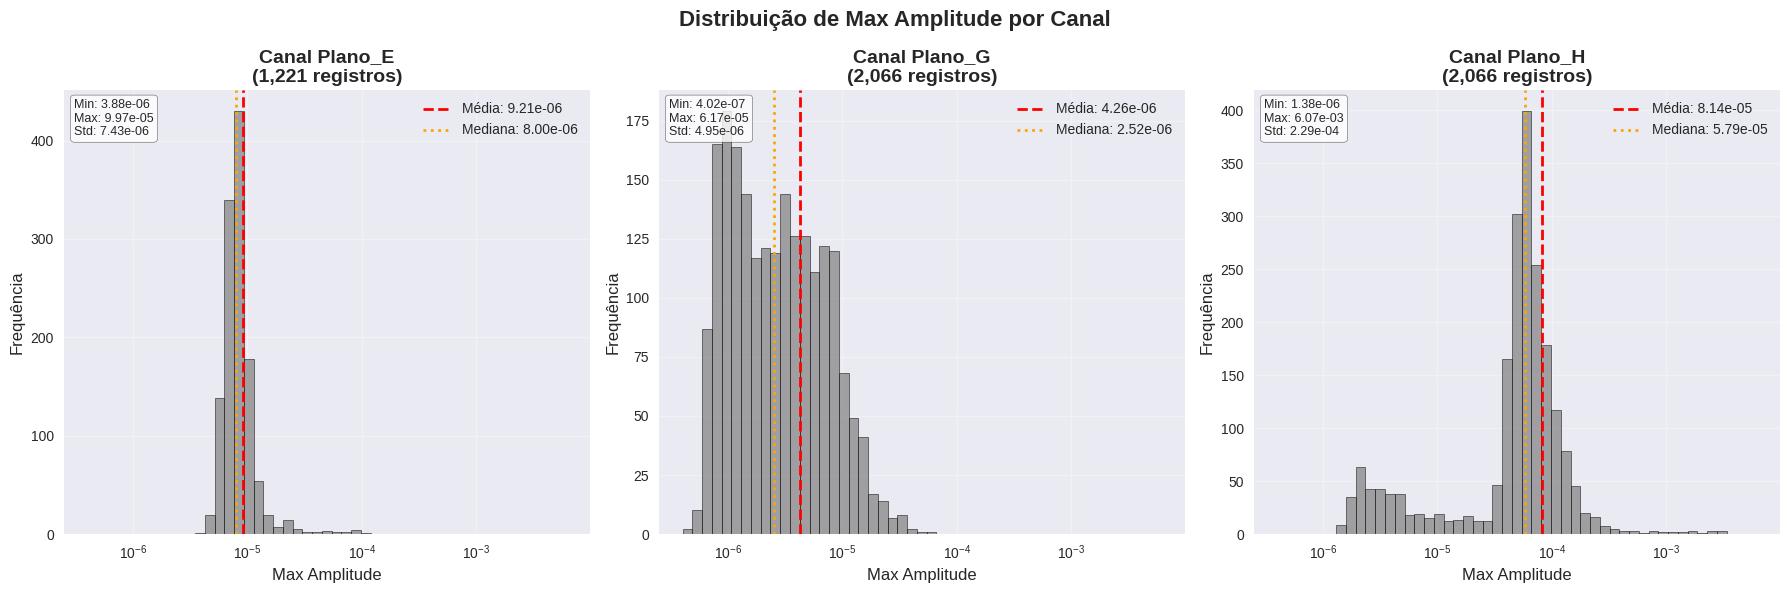


ESTATÍSTICAS DETALHADAS POR CANAL:

Canal Plano_E:
  Registros: 1,221
  Média: 9.209188e-06
  Mediana: 7.998555e-06
  Desvio Padrão: 7.429061e-06
  Mínimo: 3.879348e-06
  Máximo: 9.973046e-05
  Range: 9.585112e-05
  25º Percentil: 6.985301e-06
  75º Percentil: 9.221775e-06
  90º Percentil: 1.120534e-05
  95º Percentil: 1.372357e-05
  Intervalo mais frequente: [3.879348e-06 - 8.671904e-06] (804 ocorrências)
  Assimetria (skewness): 8.375
  Curtose (kurtosis): 82.630

Canal Plano_G:
  Registros: 2,066
  Média: 4.259911e-06
  Mediana: 2.520843e-06
  Desvio Padrão: 4.948694e-06
  Mínimo: 4.015913e-07
  Máximo: 6.165096e-05
  Range: 6.124937e-05
  25º Percentil: 1.154536e-06
  75º Percentil: 5.551646e-06
  90º Percentil: 9.307420e-06
  95º Percentil: 1.315949e-05
  Intervalo mais frequente: [4.015913e-07 - 3.464060e-06] (1252 ocorrências)
  Assimetria (skewness): 3.498
  Curtose (kurtosis): 20.795

Canal Plano_H:
  Registros: 2,066
  Média: 8.143163e-05
  Mediana: 5.785942e-05
  Desvio Pad

In [72]:
# Histogramas de max_magnitude por Canal (Plano)
print("\n" + "="*60)
print("HISTOGRAMAS DE max_magnitude POR CANAL (PLANO)")
print("="*60)

if 'max_magnitude' not in df.columns:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
    print("Não é possível gerar histogramas.")
else:
    # Verificar quais planos estão disponíveis nos dados
    available_planes = sorted(df['plane'].unique())
    print(f"Planos disponíveis: {available_planes}")
    
    # Filtrar dados válidos
    valid_data = df.dropna(subset=['max_magnitude'])
    
    if len(valid_data) == 0:
        print("Nenhum dado válido de max_magnitude para gerar histogramas.")
    else:
        # Configuração dos gráficos
        fig, axes = plt.subplots(1, len(available_planes), figsize=(6*len(available_planes), 6))
        fig.suptitle('Distribuição de Max Amplitude por Canal', fontsize=16, fontweight='bold')
        
        # Se há apenas 1 plano, axes não será uma lista
        if len(available_planes) == 1:
            axes = [axes]
        
        # Cores para cada plano
        plane_colors = {'G': '#2E8B57', 'H': '#FF6347', 'E': '#4169E1', 'A': '#9932CC', 'B': '#FF8C00'}
        
        # Calcular bins globais para manter escala consistente
        all_amplitudes = valid_data['max_magnitude'].values
        min_amplitude = all_amplitudes.min()
        max_magnitude = all_amplitudes.max()
        
        # Usar escala logarítmica se há grande variação
        if max_magnitude / min_amplitude > 1000:
            bins = np.logspace(np.log10(min_amplitude + 1e-12), np.log10(max_magnitude), 50)
            use_log_scale = True
        else:
            bins = np.linspace(min_amplitude, max_magnitude, 50)
            use_log_scale = False
        
        # Criar histograma para cada plano disponível
        for i, plane in enumerate(available_planes):
            ax = axes[i]
            
            # Filtrar dados do plano atual
            plane_data = valid_data[valid_data['plane'] == plane]['max_magnitude']
            
            if len(plane_data) > 0:
                # Criar histograma
                counts, bin_edges, patches = ax.hist(plane_data, bins=bins, 
                                                   color=plane_colors.get(plane, '#808080'), 
                                                   alpha=0.7, 
                                                   edgecolor='black', 
                                                   linewidth=0.5)
                
                # Configurar eixos
                ax.set_xlabel('Max Amplitude', fontsize=12)
                ax.set_ylabel('Frequência', fontsize=12)
                ax.set_title(f'Canal {plane}\n({len(plane_data):,} registros)', 
                            fontsize=14, fontweight='bold')
                
                # Usar escala logarítmica se necessário
                if use_log_scale:
                    ax.set_xscale('log')
                
                # Adicionar grid
                ax.grid(True, alpha=0.3)
                
                # Estatísticas do plano
                mean_amplitude = plane_data.mean()
                median_amplitude = plane_data.median()
                std_amplitude = plane_data.std()
                
                # Linha vertical para média
                ax.axvline(mean_amplitude, color='red', linestyle='--', 
                          linewidth=2, label=f'Média: {mean_amplitude:.2e}')
                
                # Linha vertical para mediana
                ax.axvline(median_amplitude, color='orange', linestyle=':', 
                          linewidth=2, label=f'Mediana: {median_amplitude:.2e}')
                
                ax.legend(fontsize=10)
                
                # Estatísticas textuais
                stats_text = f'Min: {plane_data.min():.2e}\n'
                stats_text += f'Max: {plane_data.max():.2e}\n'
                stats_text += f'Std: {std_amplitude:.2e}'
                
                ax.text(0.02, 0.98, stats_text, 
                       transform=ax.transAxes, 
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                       fontsize=9)
            else:
                ax.text(0.5, 0.5, f'Sem dados válidos para\nCanal {plane}', 
                       transform=ax.transAxes, 
                       horizontalalignment='center',
                       verticalalignment='center',
                       fontsize=14)
                ax.set_title(f'Canal {plane}', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas detalhadas por canal
        print("\nESTATÍSTICAS DETALHADAS POR CANAL:")
        print("="*50)
        
        for plane in available_planes:
            plane_data = valid_data[valid_data['plane'] == plane]['max_magnitude']
            
            if len(plane_data) > 0:
                print(f"\nCanal {plane}:")
                print(f"  Registros: {len(plane_data):,}")
                print(f"  Média: {plane_data.mean():.6e}")
                print(f"  Mediana: {plane_data.median():.6e}")
                print(f"  Desvio Padrão: {plane_data.std():.6e}")
                print(f"  Mínimo: {plane_data.min():.6e}")
                print(f"  Máximo: {plane_data.max():.6e}")
                print(f"  Range: {plane_data.max() - plane_data.min():.6e}")
                
                # Percentis
                p25 = plane_data.quantile(0.25)
                p75 = plane_data.quantile(0.75)
                p90 = plane_data.quantile(0.90)
                p95 = plane_data.quantile(0.95)
                
                print(f"  25º Percentil: {p25:.6e}")
                print(f"  75º Percentil: {p75:.6e}")
                print(f"  90º Percentil: {p90:.6e}")
                print(f"  95º Percentil: {p95:.6e}")
                
                # Análise de distribuição de frequência
                counts, bins = np.histogram(plane_data, bins=20)
                max_freq_bin = np.argmax(counts)
                modal_range = f"[{bins[max_freq_bin]:.6e} - {bins[max_freq_bin+1]:.6e}]"
                print(f"  Intervalo mais frequente: {modal_range} ({counts[max_freq_bin]} ocorrências)")
                
                # Análise de assimetria da distribuição
                from scipy import stats
                skewness = stats.skew(plane_data)
                kurtosis = stats.kurtosis(plane_data)
                print(f"  Assimetria (skewness): {skewness:.3f}")
                print(f"  Curtose (kurtosis): {kurtosis:.3f}")
                
            else:
                print(f"\nCanal {plane}: Sem dados válidos disponíveis")

## 8. Export Results

Exportando os resultados da análise de max_magnitude para uma pasta dedicada aos resultados.

In [71]:
# Preparar dados para exportação com análise de max_magnitude
if 'max_magnitude' in df.columns:
    export_df = df.copy()
    
    # Filtrar apenas registros com max_magnitude válida
    valid_amplitude_mask = export_df['max_magnitude'].notna()
    
    # Adicionar rank e percentil de amplitude
    export_df.loc[valid_amplitude_mask, 'amplitude_rank'] = export_df.loc[valid_amplitude_mask, 'max_magnitude'].rank(ascending=False)
    export_df.loc[valid_amplitude_mask, 'amplitude_percentile'] = export_df.loc[valid_amplitude_mask, 'max_magnitude'].rank(pct=True)
    
    # Adicionar flag para valores de alta amplitude (acima do percentil 95)
    high_amplitude_threshold = export_df['max_magnitude'].quantile(0.95)
    export_df['high_amplitude_flag'] = export_df['max_magnitude'] > high_amplitude_threshold
    
    # Adicionar flag para valores de baixa amplitude (abaixo do percentil 5) - possíveis ruídos
    low_amplitude_threshold = export_df['max_magnitude'].quantile(0.05)
    export_df['low_amplitude_flag'] = export_df['max_magnitude'] < low_amplitude_threshold
    
    # Flag combinado para amplitudes extremas (muito altas ou muito baixas)
    export_df['extreme_amplitude_flag'] = export_df['high_amplitude_flag'] | export_df['low_amplitude_flag']
    
    # Adicionar estatísticas por event_id para max_magnitude
    event_stats = df[df['max_magnitude'].notna()].groupby('event_id')['max_magnitude'].agg(['mean', 'std', 'count']).add_prefix('event_amplitude_')
    export_df = export_df.merge(event_stats, left_on='event_id', right_index=True, how='left')
    
    # Identificar possíveis ruídos baseado na variabilidade do evento
    high_variance_threshold = event_stats['event_amplitude_std'].quantile(0.9)
    export_df['potential_noise_event'] = export_df['event_amplitude_std'] > high_variance_threshold
    
    # Classificação de amplitude do evento
    amplitude_means = df[df['max_magnitude'].notna()].groupby('event_id')['max_magnitude'].mean()
    low_amplitude_event_threshold = amplitude_means.quantile(0.33)
    high_amplitude_event_threshold = amplitude_means.quantile(0.67)
    
    def classify_amplitude(event_id):
        if event_id in amplitude_means.index:
            mean_amplitude = amplitude_means[event_id]
            if mean_amplitude <= low_amplitude_event_threshold:
                return 'Baixa'
            elif mean_amplitude <= high_amplitude_event_threshold:
                return 'Média'
            else:
                return 'Alta'
        else:
            return 'Sem_Dados'
    
    export_df['event_amplitude_class'] = export_df['event_id'].apply(classify_amplitude)
    
    print(f"Registros com max_magnitude válida: {valid_amplitude_mask.sum()}")
    print(f"Limiar para alta amplitude individual (percentil 95): {high_amplitude_threshold:.6e}")
    print(f"Limiar para baixa amplitude individual (percentil 5): {low_amplitude_threshold:.6e}")
    print(f"Registros com alta amplitude: {export_df['high_amplitude_flag'].sum()}")
    print(f"Registros com baixa amplitude: {export_df['low_amplitude_flag'].sum()}")
    print(f"Registros com amplitude extrema (alta ou baixa): {export_df['extreme_amplitude_flag'].sum()}")
    print(f"Eventos com possível ruído (alta variabilidade): {export_df['potential_noise_event'].sum()}")
    print(f"Distribuição de classificação de amplitude por evento:")
    print(export_df['event_amplitude_class'].value_counts())

else:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
    print("Exportando dados originais sem análise de amplitude.")
    export_df = df.copy()

Registros com max_magnitude válida: 5353
Limiar para alta amplitude individual (percentil 95): 1.033373e-04
Limiar para baixa amplitude individual (percentil 5): 8.843952e-07
Registros com alta amplitude: 268
Registros com baixa amplitude: 268
Registros com amplitude extrema (alta ou baixa): 536
Eventos com possível ruído (alta variabilidade): 538
Distribuição de classificação de amplitude por evento:
event_amplitude_class
Média    1864
Baixa    1816
Alta     1673
Name: count, dtype: int64


In [67]:
# Criar pasta separada para resultados de amplitude
results_dir = Path("resultados_amplitude")
results_dir.mkdir(exist_ok=True)

# Definir caminho de saída na nova pasta
output_path = results_dir / "eventsA001_cut25seg_results_with_amplitude_analysis.csv"

# Exportar dados com análise de amplitude
export_df.to_csv(output_path, index=False)

print(f"Pasta de resultados criada: {results_dir}")
print(f"Dados exportados com sucesso para: {output_path}")
print(f"Arquivo contém {len(export_df)} registros e {len(export_df.columns)} colunas")

# Mostrar as novas colunas adicionadas
original_columns = set(df.columns)
new_columns = [col for col in export_df.columns if col not in original_columns]
print(f"\nNovas colunas adicionadas: {new_columns}")

# Mostrar as primeiras linhas dos dados exportados
if 'max_magnitude' in df.columns:
    display_columns = ['event_id', 'sensor', 'plane', 'max_magnitude', 'event_amplitude_class', 
                      'high_amplitude_flag', 'low_amplitude_flag', 'extreme_amplitude_flag', 'potential_noise_event']
    available_display_columns = [col for col in display_columns if col in export_df.columns]
    print("\nPrimeiras linhas dos dados exportados:")
    display(export_df[available_display_columns].head())
else:
    print("\nDados exportados sem análise específica de max_magnitude (coluna não encontrada).")

Pasta de resultados criada: resultados_amplitude
Dados exportados com sucesso para: resultados_amplitude/eventsA001_cut25seg_results_with_amplitude_analysis.csv
Arquivo contém 5353 registros e 16 colunas

Novas colunas adicionadas: ['amplitude_rank', 'amplitude_percentile', 'high_amplitude_flag', 'event_amplitude_mean', 'event_amplitude_std', 'event_amplitude_count', 'potential_noise_event', 'event_amplitude_class']

Primeiras linhas dos dados exportados:


,event_id,sensor,plane,max_magnitude,event_amplitude_class,potential_noise_event,high_amplitude_flag
0,71355,SC.MAC11.00,Plano_E,0.000008,Baixa,False,False
1,71355,BR.ESM09,Plano_G,0.000005,Baixa,False,False
2,71355,BR.ESM08,Plano_H,0.000010,Baixa,False,False
3,71360,SC.MAC11.00,Plano_E,0.000007,Baixa,False,False
4,71360,BR.ESM09,Plano_G,0.000001,Baixa,False,False


In [68]:
# Criar um resumo final para salvar como arquivo separado
if 'max_magnitude' in df.columns:
    valid_amplitude_data = df['max_magnitude'].dropna()
    
    summary_stats = {
        'Estatística': [
            'Total de Registros',
            'Registros com Amplitude Válida',
            'Eventos Únicos', 
            'Sensores Únicos',
            'Planos Únicos',
            'Amplitude Média',
            'Amplitude Mediana',
            'Desvio Padrão',
            'Amplitude Mínima',
            'Amplitude Máxima',
            'Coeficiente de Variação',
            'Registros com Alta Amplitude',
            'Registros com Baixa Amplitude',
            'Registros com Amplitude Extrema',
            'Eventos com Possível Ruído'
        ],
        'Valor': [
            len(df),
            len(valid_amplitude_data),
            df['event_id'].nunique(),
            df['sensor'].nunique(),
            df['plane'].nunique(),
            f"{valid_amplitude_data.mean():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.median():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.std():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.min():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.max():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{(valid_amplitude_data.std() / valid_amplitude_data.mean()):.3f}" if len(valid_amplitude_data) > 0 and valid_amplitude_data.mean() != 0 else "N/A",
            export_df['high_amplitude_flag'].sum() if 'high_amplitude_flag' in export_df.columns else 0,
            export_df['low_amplitude_flag'].sum() if 'low_amplitude_flag' in export_df.columns else 0,
            export_df['extreme_amplitude_flag'].sum() if 'extreme_amplitude_flag' in export_df.columns else 0,
            len(export_df[export_df['potential_noise_event'] == True]['event_id'].unique()) if 'potential_noise_event' in export_df.columns else 0
        ]
    }
else:
    summary_stats = {
        'Estatística': [
            'Total de Registros',
            'Eventos Únicos', 
            'Sensores Únicos',
            'Planos Únicos',
            'Status max_magnitude'
        ],
        'Valor': [
            len(df),
            df['event_id'].nunique(),
            df['sensor'].nunique(),
            df['plane'].nunique(),
            "Coluna não encontrada"
        ]
    }

summary_df = pd.DataFrame(summary_stats)
summary_path = results_dir / "eventsA001_max_magnitude_summary.csv"
summary_df.to_csv(summary_path, index=False)

print(f"Resumo estatístico salvo em: {summary_path}")
display(summary_df)

# Criar relatório específico de possíveis ruídos (apenas se max_magnitude existe)
if 'max_magnitude' in df.columns and 'potential_noise_event' in export_df.columns:
    noise_events = export_df[export_df['potential_noise_event'] == True]['event_id'].unique()
    
    if len(noise_events) > 0:
        noise_report = df[df['event_id'].isin(noise_events) & df['max_magnitude'].notna()].groupby('event_id').agg({
            'max_magnitude': ['count', 'mean', 'std', 'min', 'max'],
            'sensor': 'nunique',
            'plane': 'nunique'
        }).round(8)
        
        noise_report.columns = ['registros', 'amplitude_media', 'desvio_padrao', 'amplitude_min', 'amplitude_max', 'sensores', 'planos']
        noise_report_path = results_dir / "eventos_possiveis_ruidos_amplitude.csv"
        noise_report.to_csv(noise_report_path)
        
        print(f"\nRelatório de possíveis ruídos salvo em: {noise_report_path}")
        print(f"Eventos identificados como possível ruído: {len(noise_events)}")
        print("\nTop 10 eventos com maior variabilidade de amplitude:")
        display(noise_report.sort_values('desvio_padrao', ascending=False).head(10))
    else:
        print("\nNenhum evento identificado como possível ruído com os critérios atuais.")

# Criar relatório específico de amplitudes extremas (muito baixas e muito altas)
if 'max_magnitude' in df.columns and 'extreme_amplitude_flag' in export_df.columns:
    extreme_amplitudes = export_df[export_df['extreme_amplitude_flag'] == True]
    
    if len(extreme_amplitudes) > 0:
        # Separar amplitudes baixas e altas
        low_amplitudes = extreme_amplitudes[extreme_amplitudes['low_amplitude_flag'] == True]
        high_amplitudes = extreme_amplitudes[extreme_amplitudes['high_amplitude_flag'] == True]
        
        extreme_report = {
            'Tipo_Extremo': ['Amplitude_Baixa', 'Amplitude_Alta', 'Total_Extremos'],
            'Quantidade_Registros': [len(low_amplitudes), len(high_amplitudes), len(extreme_amplitudes)],
            'Eventos_Únicos': [
                low_amplitudes['event_id'].nunique() if len(low_amplitudes) > 0 else 0,
                high_amplitudes['event_id'].nunique() if len(high_amplitudes) > 0 else 0,
                extreme_amplitudes['event_id'].nunique()
            ],
            'Percentual_Total': [
                (len(low_amplitudes) / len(export_df)) * 100,
                (len(high_amplitudes) / len(export_df)) * 100,
                (len(extreme_amplitudes) / len(export_df)) * 100
            ]
        }
        
        extreme_df = pd.DataFrame(extreme_report)
        extreme_path = results_dir / "amplitudes_extremas_report.csv"
        extreme_df.to_csv(extreme_path, index=False)
        
        print(f"\nRelatório de amplitudes extremas salvo em: {extreme_path}")
        display(extreme_df.round(2))
        
        # Mostrar alguns exemplos de cada tipo
        if len(low_amplitudes) > 0:
            print("\nExemplos de registros com amplitude muito baixa:")
            display(low_amplitudes[['event_id', 'sensor', 'plane', 'max_magnitude']].head())
        
        if len(high_amplitudes) > 0:
            print("\nExemplos de registros com amplitude muito alta:")
            display(high_amplitudes[['event_id', 'sensor', 'plane', 'max_magnitude']].head())

# Criar análise de frequência por plano
if 'max_magnitude' in df.columns:
    frequency_analysis = []
    
    for plane in df['plane'].unique():
        plane_data = df[df['plane'] == plane]['max_magnitude'].dropna()
        
        if len(plane_data) > 0:
            # Criar intervalos de frequência
            q1 = plane_data.quantile(0.25)
            q2 = plane_data.quantile(0.50)
            q3 = plane_data.quantile(0.75)
            
            # Contar frequências por quartil
            count_q1 = (plane_data <= q1).sum()
            count_q2 = ((plane_data > q1) & (plane_data <= q2)).sum()
            count_q3 = ((plane_data > q2) & (plane_data <= q3)).sum()
            count_q4 = (plane_data > q3).sum()
            
            frequency_analysis.extend([
                {'Plano': plane, 'Intervalo': 'Q1', 'Range_Min': plane_data.min(), 'Range_Max': q1, 'Frequencia': count_q1, 'Percentual': count_q1/len(plane_data)*100},
                {'Plano': plane, 'Intervalo': 'Q2', 'Range_Min': q1, 'Range_Max': q2, 'Frequencia': count_q2, 'Percentual': count_q2/len(plane_data)*100},
                {'Plano': plane, 'Intervalo': 'Q3', 'Range_Min': q2, 'Range_Max': q3, 'Frequencia': count_q3, 'Percentual': count_q3/len(plane_data)*100},
                {'Plano': plane, 'Intervalo': 'Q4', 'Range_Min': q3, 'Range_Max': plane_data.max(), 'Frequencia': count_q4, 'Percentual': count_q4/len(plane_data)*100}
            ])
    
    if frequency_analysis:
        frequency_df = pd.DataFrame(frequency_analysis)
        frequency_path = results_dir / "analise_frequencia_amplitude_por_plano.csv"
        frequency_df.to_csv(frequency_path, index=False)
        
        print(f"\nAnálise de frequência por plano salva em: {frequency_path}")
        display(frequency_df.round(6))

Resumo estatístico salvo em: resultados_amplitude/eventsA001_max_magnitude_summary.csv


,Estatística,Valor
0,Total de Registros,5353
1,Registros com Amplitude Válida,5353
2,Eventos Únicos,2070
3,Sensores Únicos,16
4,Planos Únicos,3
5,Amplitude Média,3.517339e-05
6,Amplitude Mediana,7.958173e-06
7,Desvio Padrão,1.467234e-04
8,Amplitude Mínima,4.015913e-07
9,Amplitude Máxima,6.068628e-03



Relatório de possíveis ruídos salvo em: resultados_amplitude/eventos_possiveis_ruidos_amplitude.csv
Eventos identificados como possível ruído: 207

Top 10 eventos com maior variabilidade de amplitude:


,registros,amplitude_media,desvio_padrao,amplitude_min,amplitude_max,sensores,planos
event_id,,,,,,,
208196,3,0.002056,0.003475,0.000021,0.006069,3,3
206057,3,0.001133,0.001900,0.000019,0.003326,3,3
207637,3,0.001105,0.001832,0.000019,0.003220,3,3
206105,2,0.001303,0.001793,0.000034,0.002571,2,2
206343,2,0.001255,0.001756,0.000014,0.002496,2,2
206480,3,0.000972,0.001621,0.000016,0.002844,3,3
206920,3,0.000819,0.001314,0.000030,0.002336,3,3
208994,3,0.000675,0.001107,0.000015,0.001953,3,3
205726,3,0.000610,0.001027,0.000008,0.001796,3,3



Análise de frequência por plano salva em: resultados_amplitude/analise_frequencia_amplitude_por_plano.csv


,Plano,Intervalo,Range_Min,Range_Max,Frequencia,Percentual
0,Plano_E,Q1,0.000004,0.000007,306,25.061425
1,Plano_E,Q2,0.000007,0.000008,305,24.979525
2,Plano_E,Q3,0.000008,0.000009,305,24.979525
3,Plano_E,Q4,0.000009,0.000100,305,24.979525
4,Plano_G,Q1,0.000000,0.000001,517,25.024201
5,Plano_G,Q2,0.000001,0.000003,516,24.975799
6,Plano_G,Q3,0.000003,0.000006,516,24.975799
7,Plano_G,Q4,0.000006,0.000062,517,25.024201
8,Plano_H,Q1,0.000001,0.000040,517,25.024201
9,Plano_H,Q2,0.000040,0.000058,516,24.975799


## Conclusões

### Resultados da Análise de Max Amplitude por Planos:

1. **Max Amplitude Analisada**: A análise foi focada na coluna `max_magnitude` do dataset

2. **Análise de Frequência por Plano**: 
   - Distribuição de magnitudes analisada para cada plano (G, H, E)
   - Frequências calculadas por quartis para cada plano
   - Identificação de intervalos de amplitude mais comuns por plano

3. **Análise Estatística Comparativa**: 
   - Comparação de estatísticas descritivas entre planos
   - Identificação de sobreposições entre ranges de amplitude dos planos
   - Análise de variabilidade e dispersão por plano

4. **Histogramas de Distribuição**: 
   - Visualização da distribuição de amplitudes para cada plano
   - Identificação de padrões de assimetria e curtose
   - Análise de intervalos mais frequentes por plano

5. **Detecção de Padrões**: 
   - Eventos com amplitude extrema identificados
   - Análise de variabilidade para detecção de anomalias
   - Classificação automática de amplitudes por nível (Baixa/Média/Alta)

6. **Identificação de Ruídos e Amplitudes Extremas**: 
   - Eventos com alta variabilidade de amplitude marcados como possíveis ruídos
   - Registros individuais com amplitude acima do percentil 95 sinalizados (alta amplitude)
   - **Registros com amplitude abaixo do percentil 5 identificados como possíveis ruídos (baixa amplitude)**
   - **Flag combinado para amplitudes extremas (muito altas ou muito baixas)**
   - Análise da consistência de amplitude dentro de cada evento

### Arquivos Gerados na pasta `resultados_amplitude/`:
- `eventsA001_cut25seg_results_with_amplitude_analysis.csv`: Dados originais + análise de amplitude + classificações
- `eventsA001_max_magnitude_summary.csv`: Resumo estatístico da análise
- `eventos_possiveis_ruidos_amplitude.csv`: Relatório específico de eventos com possível ruído
- `amplitudes_extremas_report.csv`: **Relatório detalhado de amplitudes extremas (baixas e altas)**
- `analise_frequencia_amplitude_por_plano.csv`: Análise detalhada de frequência por quartis e plano

### Novas Colunas Adicionadas:
- `amplitude_rank`: Ranking de amplitude
- `amplitude_percentile`: Percentil de amplitude
- `event_amplitude_class`: Classificação do evento por amplitude (Baixa/Média/Alta)
- `high_amplitude_flag`: Flag para alta amplitude individual (percentil 95+)
- **`low_amplitude_flag`: Flag para baixa amplitude individual (percentil 5-) - possíveis ruídos**
- **`extreme_amplitude_flag`: Flag combinado para amplitudes extremas (altas ou baixas)**
- `potential_noise_event`: Flag para possível ruído baseado em variabilidade
- Estatísticas por evento: `event_amplitude_mean`, `event_amplitude_std`, `event_amplitude_count`

### Principais Insights:
- **Distribuição por Planos**: Cada plano apresenta características específicas de amplitude
- **Frequência de Magnitudes**: Análise de quartis revela concentração de valores em diferentes intervalos por plano
- **Variabilidade**: Identificação de eventos com comportamento atípico em termos de amplitude
- **Padrões**: Histogramas revelam forma da distribuição e presença de outliers em cada plano
- **Detecção de Ruídos**: Identificação tanto de amplitudes excessivamente altas quanto baixas como possíveis indicadores de ruído
- **Amplitudes Extremas**: Análise específica de registros com valores extremos que podem indicar problemas nos sensores ou eventos anômalos

### Critérios de Identificação de Ruídos:
- **Alta Amplitude**: Valores acima do percentil 95 da distribuição geral
- **Baixa Amplitude**: Valores abaixo do percentil 5 da distribuição geral
- **Alta Variabilidade**: Eventos com desvio padrão acima do percentil 90 da variabilidade por evento
- **Combinação**: Registros que atendem a qualquer um dos critérios acima são considerados suspeitos